Step 1 : Data Import

In [42]:
import pandas as pd

# Step 1 - Sourcing 
# Import the data present in the source file loan

# Path of the Source File
file_path = 'E:/SourceCode/001-Upgrad/python/jupyter_notebooks/LandingClubCaseStudy/data/loan/loan.csv'

# Read the loan  CSV file into a DataFrame
src_df = pd.read_csv(file_path)

# Display the data frame header for verification

#print(source_df.head())
# Total 111 Columns are there

C:\Users\Admin\AppData\Local\Temp\ipykernel_6384\676215585.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  src_df = pd.read_csv(file_path)


In [70]:
# Step 2 Data Clenup

# A lot of cloumns have only NA value.
# Step 2.1 Remove columns which hvave only NA as value

na_only_columns = src_df.columns[src_df.isna().all()].tolist()

# data frame after removal of na_only_columns
df_cleaned = src_df.dropna(axis=1, how='all')

#print("Columns after stage 01 cleaning:" , df_cleaned_01.head())

# df_cleaned_01 has 57 columns 


In [80]:
# Step 2.2 Remove months from term column

# remove month suffix from terms column
df_cleaned['term'] = df_cleaned['term'].str.replace('months', '', regex=False)

# round off value for funded_amnt_inv column
df_cleaned['funded_amnt_inv'] = df_cleaned['funded_amnt_inv'].round().astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_6384\3201556805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['term'] = df_cleaned['term'].str.replace('months', '', regex=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6384\3201556805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['funded_amnt_inv'] = df_cleaned['funded_amnt_inv'].round().astype(int)


In [88]:
# Filter the data on loan_status where status is chaged off 

filtered_data = df_cleaned[df_cleaned['loan_status'] == 'Charged Off']

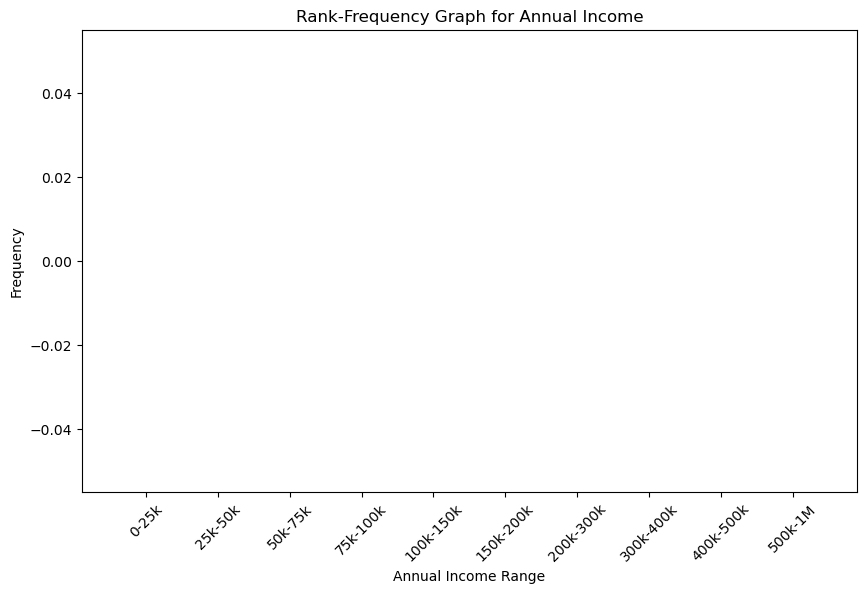

In [122]:
# Univariant Analysis



# Create a copy of the 'annual_inc' column to avoid modifying the original DataFrame
annual_inc_data = filtered_data['annual_inc'].copy()

# Convert the 'annual_inc' column to numeric, coercing errors to NaN
annual_inc_data = pd.to_numeric(annual_inc_data, errors='coerce')

# Drop missing values from the 'annual_inc' data
annual_inc_data = annual_inc_data.dropna()

# Define the bin ranges for annual income
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 400000, 500000, 1000000]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-1M']

# Bin the annual income data
annual_inc_binned = pd.cut(annual_inc_data, bins=bins, labels=labels, right=False)

# Count the frequency of each bin
annual_inc_freq = annual_inc_binned.value_counts().sort_values(ascending=False)

# Plot the rank-frequency graph
plt.figure(figsize=(10, 6))
plt.bar(annual_inc_freq.index, annual_inc_freq.values)
plt.title('Rank-Frequency Graph for Annual Income')
plt.xlabel('Annual Income Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()





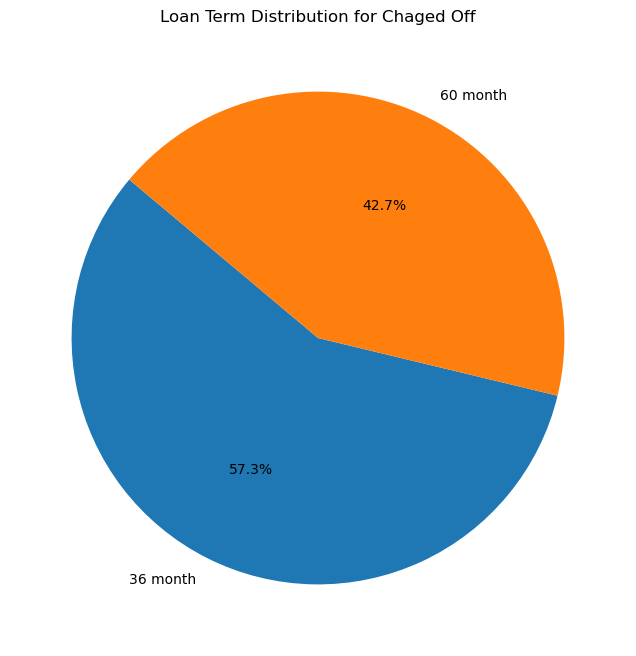

In [124]:
import matplotlib.pyplot as plt

# Univariant Analysis

#filtered_data['term'] = filtered_data['term'].astype(int)


# Calculate the frequency of each unique run value
term_counts = filtered_data['term'].value_counts().sort_index()

# Append "month" to each term value for the labels in the pie chart
labels = [f"{term.strip()} month" for term in term_counts.index]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(term_counts,labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Loan Term Distribution for Chaged Off')
plt.show()